# <font color=Purple> **1. Problem Statement:**


IMDB scores for the movies are taken as target variable and the predictor variables are analysed and passed to a machine learning model to make accurate movie rating prediction.



**Introduction:** IMDb registered users can cast a vote (from 1 to 10) on every released title in the database. Individual votes are then aggregated and summarized as a single IMDb rating, visible on the title's main page.
Users can check the Imdb rating and reviews of a movie before watching the movie. I personally check the IMDB movie rating before spending 2+ hours of time on a movie.

**Brief description of the Dataset:**
The dataset consists of 5000+ IMDB movies and related information scraped from various scources and all the data are combined to form a Dataset which can be used to train a machine learning model to predict the ratings based on pre set criteria.It has 27 independent variables and one dependent(target) variable. The dataset has information about 4998 unique movies, its directors and actors. In total there are 2399 directors, 8161 actors and their popularity. The combined dataset is available on Github.



# 2 .<font color=Purple> **Importing the required Python libraries**

In [1]:
import numpy as np #linear algebra
import pandas as pd #data preprocessing, csv file
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import seaborn as sns
import matplotlib.ticker as mtick #fpr specifying the axis tick formats
import missingno
import matplotlib.patches as patches

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

In [4]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error

# 3. <font color=Purple> **Loading the data**

In [5]:
#lOADING DATA FROM URL
url = 'https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv'
df1 = pd.read_csv(url)


In [6]:
#Code to load data from data saved on drive
#from google.colab import drive
#drive.mount('/content/drive'
#data= pd.read_csv("./drive/My Drive/ehealth_test/data.csv")

In [7]:
df1.head() #first 5 rows of the dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# 4. <font color=Purple> **Inspect the data**


 <font color=Blue> 4.1. **Dropping Duplicate Records**


In [8]:
df1.duplicated().sum() 

45

There are 45 dupliacte records in the data. Dropping the duplicates in the below column 

In [9]:
df1.drop_duplicates(keep="first",inplace=True)

In [10]:
df1.reset_index(inplace=True,drop=True)

In [11]:
df1.duplicated().sum()

0

In [12]:
df1.shape

(4998, 28)

<font color=Blue>4.2. **Further data exploration**

In [13]:
pd.set_option('display.max_columns',35)
df1.head() #Displaying head(first 5 rows) of the dataset after dropping duplicates

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [14]:
df1.info() #Info abput datatypes and null values of the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4979 non-null   object 
 1   director_name              4895 non-null   object 
 2   num_critic_for_reviews     4949 non-null   float64
 3   duration                   4983 non-null   float64
 4   director_facebook_likes    4895 non-null   float64
 5   actor_3_facebook_likes     4975 non-null   float64
 6   actor_2_name               4985 non-null   object 
 7   actor_1_facebook_likes     4991 non-null   float64
 8   gross                      4124 non-null   float64
 9   genres                     4998 non-null   object 
 10  actor_1_name               4991 non-null   object 
 11  movie_title                4998 non-null   object 
 12  num_voted_users            4998 non-null   int64  
 13  cast_total_facebook_likes  4998 non-null   int64

**From the above information we can infer that data types of int, float and object are used. There are also null values present in the dataset.**

In [15]:
df1.isnull().sum() # Gives number of null values present in each column

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

**Most of the columns except genres, movie_title, num_voted_users, cast_total_facebook_likes, movie_imdb_link, imdb_score and  movie_facebook_likes  state that they have null values in it.**

---





In [16]:
#understand the data more by using describe method
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4949.0,1.398901e+02,1.214776e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,4983.0,1.072133e+02,2.524878e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4895.0,6.886791e+02,2.821650e+03,0.00,7.00,49.00,192.00,2.300000e+04
actor_3_facebook_likes,4975.0,6.399009e+02,1.643298e+03,0.00,133.00,369.00,635.00,2.300000e+04
actor_1_facebook_likes,4991.0,6.556940e+03,1.506159e+04,0.00,611.50,984.00,11000.00,6.400000e+05
gross,4124.0,4.832565e+07,6.796483e+07,162.00,5304835.25,25445749.00,62319416.00,7.605058e+08
num_voted_users,4998.0,8.347020e+04,1.380866e+05,5.00,8560.00,34260.50,96120.75,1.689764e+06
cast_total_facebook_likes,4998.0,9.676941e+03,1.816540e+04,0.00,1405.50,3085.50,13740.50,6.567300e+05
facenumber_in_poster,4985.0,1.368907e+00,2.014623e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,4977.0,2.720147e+02,3.777762e+02,1.00,64.00,156.00,324.00,5.060000e+03


In [17]:
#describe count of categorical features
df1.describe(include = object).T

,count,unique,top,freq
color,4979,2,Color,4772
director_name,4895,2398,Steven Spielberg,26
actor_2_name,4985,3032,Morgan Freeman,20
genres,4998,914,Drama,235
actor_1_name,4991,2097,Robert De Niro,49
movie_title,4998,4917,Home,3
actor_3_name,4975,3521,Ben Mendelsohn,8
plot_keywords,4846,4760,based on novel,4
movie_imdb_link,4998,4919,http://www.imdb.com/title/tt2224026/?ref_=fn_t...,3
language,4986,47,English,4662


We will analyze individually the null values and other columns



<font color=Blue> 4.3. **Exploring each attribute individually**

In [18]:
def value_counts(df,col= None,bins_cnt= 0): #Funtion to find value counts for categorical and continous variables as well
  if not(col): #For entire dataframe
    for i in df.columns:
      if df.dtypes[i]== "O" : #$if the column is categorical or of string/object type
        print("**********************  Value counts for "+i+"    **********************")
        print("Total number of unique values   "+str(len(df[i].value_counts(dropna=False)))+" of "+str(len(df))+" records \n", df[i].value_counts(dropna=False))#toget null vaue counts as we
      else:
        bins_cnt = 7 #to get the continous variables based on range, value_counts (7 subsets) 
        print("**********************  Value counts for "+i+"     **********************")
        print("Total number of unique values   "+str(len(df[i].value_counts(dropna=False)))+" of "+str(len(df))+" records \n", df[i].value_counts(dropna=False,bins=bins_cnt))
  else: #for a specified column
    if df.dtypes[col]== "O" :
      print("**********************  Value counts for "+col+"     **********************")
      print("Total number of unique values   "+str(len(df[col].value_counts(dropna=False)))+" of "+str(len(df))+"  records \n",df[col].value_counts(dropna=False))#toget null vaue counts for a single col and if its of object type
    else: #toget null vaue counts for a single col and if its not of object type
      print("**********************  Value counts for "+col+"     **********************")
      bins_cnt = 7
      print("Total number of unique values   "+str(len(df[col].value_counts(dropna=False)))+" of "+str(len(df))+"  records \n", df[col].value_counts(dropna=False,bins=bins_cnt))


In [19]:
value_counts(df1) #generating value counts for all the columns in the dataframe with the custom function defined

**********************  Value counts for color    **********************
Total number of unique values   3 of 4998 records 
 Color               4772
 Black and White     207
NaN                   19
Name: color, dtype: int64
**********************  Value counts for director_name    **********************
Total number of unique values   2399 of 4998 records 
 NaN                 103
Steven Spielberg     26
Woody Allen          22
Martin Scorsese      20
Clint Eastwood       20
                   ... 
Steve Antin           1
Brett Piper           1
Robinson Devor        1
Janusz Kaminski       1
Charles Shyer         1
Name: director_name, Length: 2399, dtype: int64
**********************  Value counts for num_critic_for_reviews     **********************
Total number of unique values   529 of 4998 records 
 (0.187, 117.0]    2611
(117.0, 233.0]    1464
(233.0, 349.0]     531
(349.0, 465.0]     227
(465.0, 581.0]      79
(581.0, 697.0]      26
(697.0, 813.0]      11
Name: num_critic_for

Insights from Value Counts:


1.   From the value counts obtained, it is clear that few columns like directors name, imdb link, movie name, actor names are just names and each name is not repeated more than 50 times and these names if one hot encoded will create a sparse matrix and hence will not contribute to predicting rating accurately, instead the directors/actors facebook likes can give an idea of the popularity of the person which in turn might contribute to movie rating.
2.   The plot key words are varying for each movie and do not appear to give any concrete information related to the movie review rating and if one hot encoded will result in sparse matrix.
3. The genre column is sub divided, we might want to aggregate and check the impact on review rating.
4. We might also consider encoding IMDB scores on scale of 3 and find out how this affects the model results, making it a classification problem
5. Color, Language, aspect_ratio,country, content_rating columns have almost close to 96 % records with same value. Hence these column will not contribute to movie ratring, this could be removed.
9. Check if cast_total_facebook likes equals sum of individiual actor, this might help us remove redundancy in data.


<font color=Blue> 4.4. **Data Manipulation**


In [20]:
def get_mean_based_on_two_col(df,col1,col2): #Function to create bar plots based on one categorical feature
  df_mean = df.groupby([col1]).mean()
  #df_mean.reset_index(inplace=True)
  df_imdb = df_mean[[col2]]
  df_imdb = df_imdb.sort_values(by=[col2],ascending =False)
  df_imdb[:30].plot(kind='bar')
  plt.title(col2+' mean values grouped by '+col1, fontsize = 15)
  plt.show()

def get_count_based_on_col(df,col1): #Function to create bar plots based on one categorical feature
  df[col1].value_counts()[:15].plot(kind='bar')
  plt.title(col1+"  value counts for top 15", fontsize = 15)
  plt.show()


def joint_plot(df,col1,col2): ##Function to create jointplots based on one categorical feature
  sns.jointplot(x=col1, y=col2,
              data=df, kind="reg", stat_func=None,
              marginal_kws={"bins": 10, "kde": False});


# #print(actor_gross_mean_sort)
# plt.title("Actor 2 mean", fontsize = 15)
# actor_2_gross_mean_sort[:30].plot(kind='bar')
# plt.show()

4.4.1. Dropping columns and corresponding EDA
Looking for the columns importance and any domain significance before dropping it

**Variation in IMDB score for based on 'director_name', 'actor_2_name','actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link' columns :**

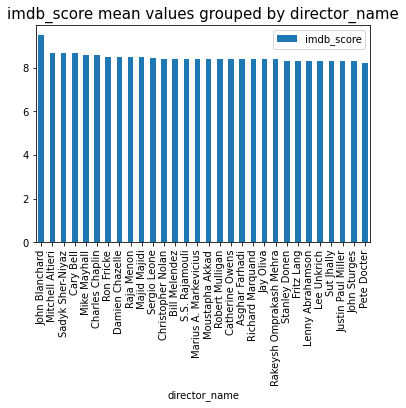

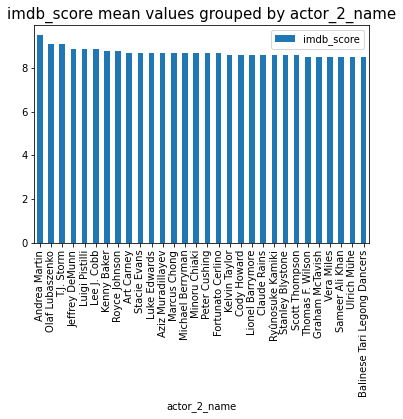

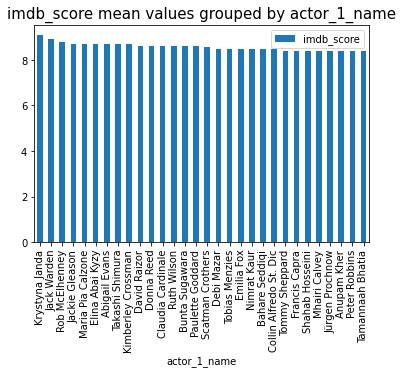

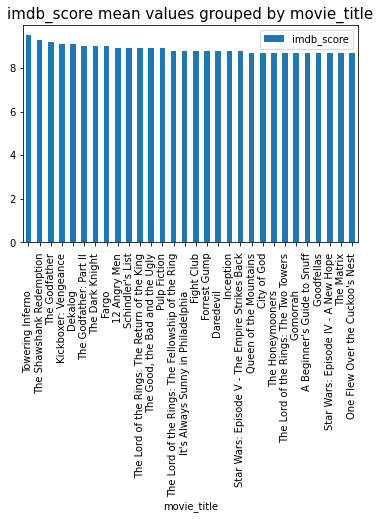

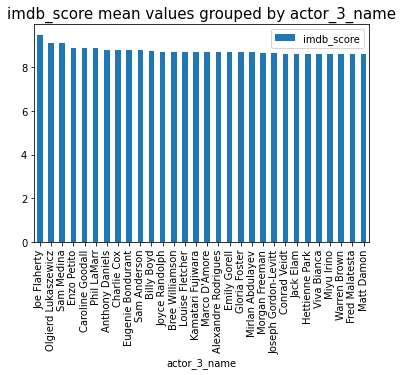

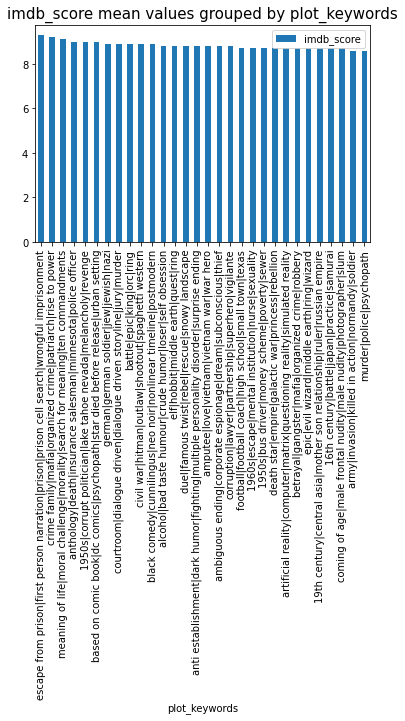

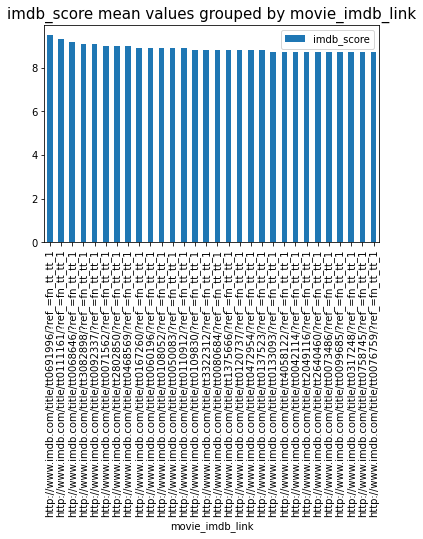

In [22]:
for i in ['director_name','actor_2_name','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link']:
  get_mean_based_on_two_col(df1,i,'imdb_score')


In [23]:
# df1.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

**Top 15 categories of each column from ('director_name','actor_2_name','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link') based on count:**

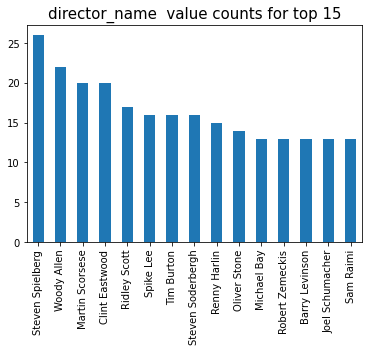

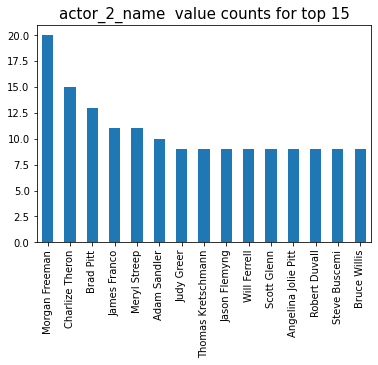

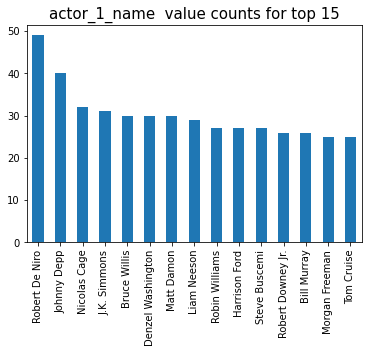

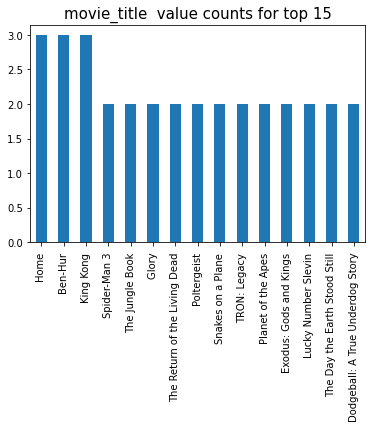

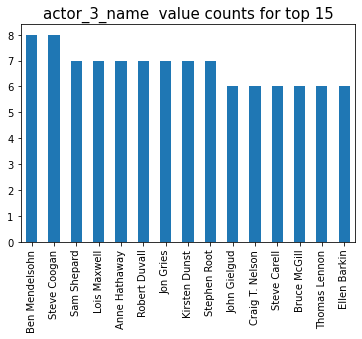

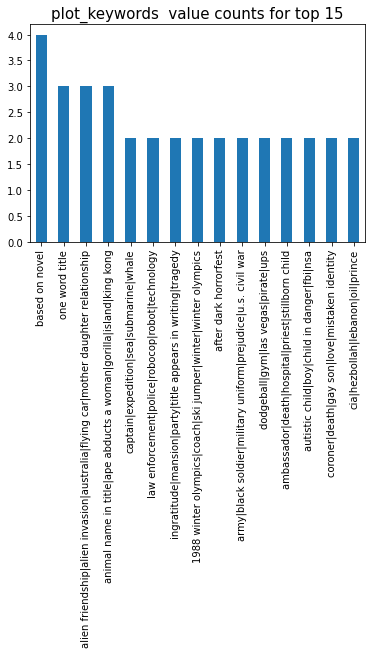

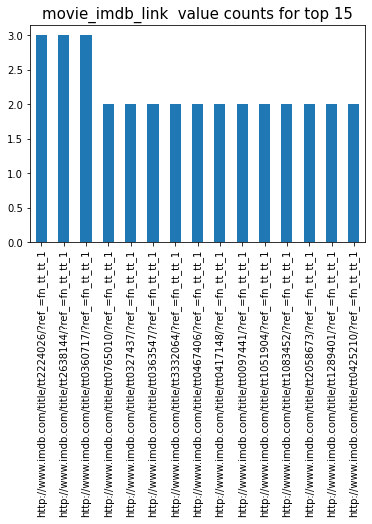

In [24]:
for i in ['director_name','actor_2_name','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link']:
  get_count_based_on_col(df1,i)
#Representation of the unique values for each attribute (top 15):


 

1.   As mentioned in valuecounts section, and from our observation from the above graphs,we can observe that the features director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link are not useful in analysis as they do not convey any concrete info and each categorical variable had maximum of 20 entries, one hot encoding these featurees does not make sense. 


2.   Hence, will be dropping the above mentioned features. One hot encoding the categorical features would make the dataset sparse and will effect model performnace hence this is best dropped

In [25]:
df1 = df1.drop(['director_name','actor_2_name','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link'],axis = 1) #Dropping columns

In [26]:
df1.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,602.0,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,NaN,131.0,NaN,131.0,NaN,Documentary,8,143,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


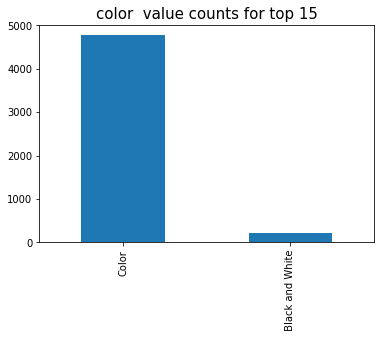

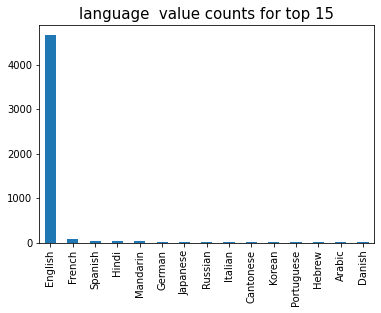

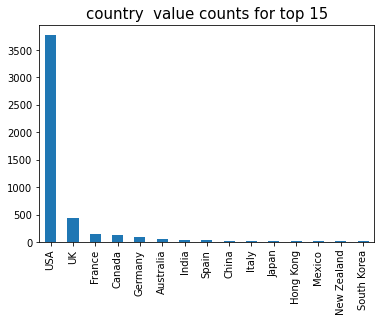

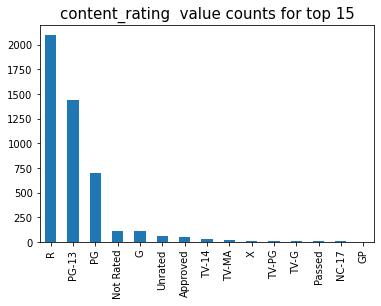

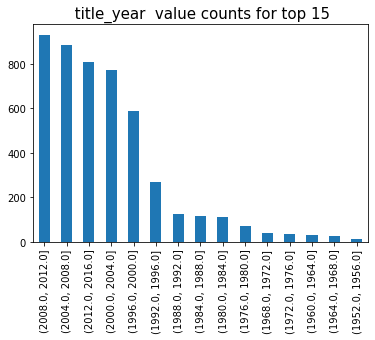

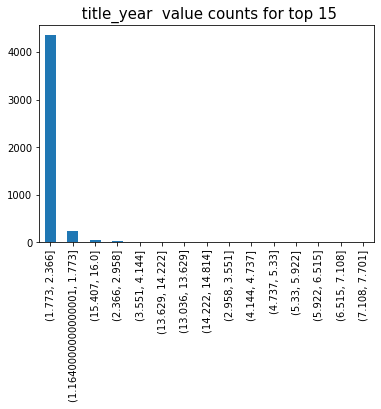

In [30]:
for i in [ 'color', 'language', 'country', 'content_rating']: #Variables [ 'color', 'language', 'country', 'content_rating','title_year','aspect_ratio']
  get_count_based_on_col(df1,i)
df1['title_year'].value_counts(bins= 25)[:15].plot(kind='bar')
plt.title(" title_year  value counts for top 15", fontsize = 15)
plt.show()

df1['aspect_ratio'].value_counts(bins= 25)[:15].plot(kind='bar')
plt.title(" title_year  value counts for top 15", fontsize = 15)
plt.show()

Each of the above mentioned column values are not repeated more than 20 to 30  times (they have many unique values, ) or have one value for more than 95% of the data. Hence instead of considering the names of directors or actors, we are considering the popularity based on facebook likes.

One hot encoding the categorical features with this frequency would make the dataset sparse and will affect model performnace hence this is best dropped

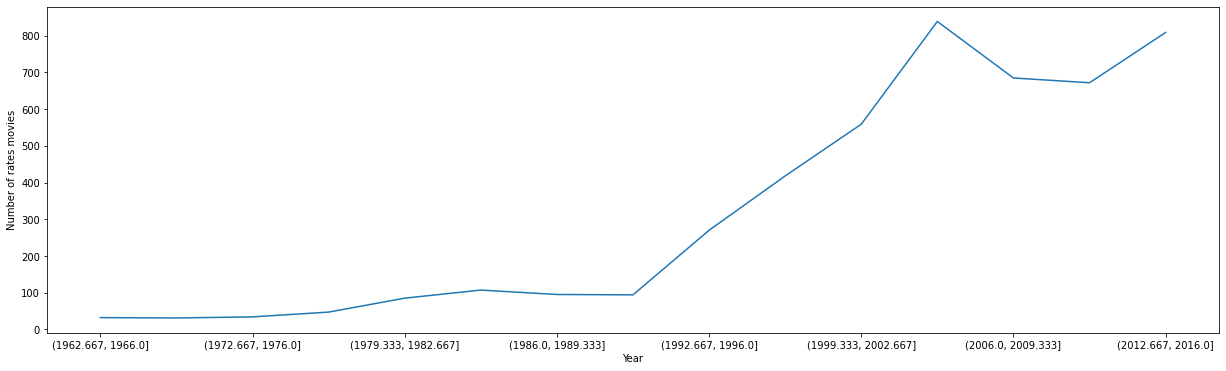

In [31]:
df1.title_year.value_counts(bins=30)[:15].sort_index().plot(figsize=(21, 6))
plt.xlabel("Year")
plt.ylabel("Number of rates movies");
#This shows number of movies rated each year are not uniform, hence this could not be a contributing factor to rating prediction, data is skewed and has mst of the movies after 2000

1.   As mentioned in value counts section, Color, Language,country, 
content_rating columns have almost close to 96 % records with same value. Hence these column will not contribute to movie ratring, this could be removed.

2.   Columns title_year, aspect_ratio  and content_rating columns also are imbalanced and are not correlated to ratings columns, almost all the unique values of the column are contributong equally to imdb score, these colums as well can be dropped.


3.   Same as mentioned above One hot encoding the categorical features with this frequency would make the dataset sparse and will effect model performnace hence this is best dropped

In [32]:
df1 = df1.drop([ 'color', 'language', 'country', 'content_rating',
       'title_year',
       'aspect_ratio'],axis = 1)

4.4.2. Exploring the genres column

In [33]:
from collections import defaultdict

genres = defaultdict(list)
for _, row in df1.iterrows():
  #print(row.genres)
  for genre in row.genres.split("|"):
      genres[genre].append(row)



In [34]:
# Remove genres with less than 10 entries
genres = {genre: pd.DataFrame(entries)
          for genre, entries in genres.items()
          if len(entries) > 10}

# Reconstruct the DataFrames
byGenre = None
for genre, dframe in genres.items():
    dframe["genre"] = genre
    if byGenre is None:
        byGenre = dframe
    else:
        byGenre = byGenre.append(dframe)

In [184]:
topGenres.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
genre,,,,,,,,,,,,,,
Documentary,67.844828,93.708333,381.241667,99.345794,1193.105263,1.212145e+07,12554.966942,1631.132231,0.669421,87.144068,4.795311e+06,279.714286,7.180165,2453.735537
Biography,162.419244,124.982877,1372.758621,622.928082,7937.410959,3.406150e+07,85707.349315,11350.849315,1.065292,235.023973,2.634356e+07,1999.976027,7.150000,10969.017123
History,138.426471,137.333333,1009.480198,647.519608,5165.531707,3.549276e+07,74448.580488,8022.346341,1.126829,262.715686,4.086964e+07,1479.504902,7.084878,7358.243902
War,128.985714,131.380952,1002.231884,614.219048,6157.290476,3.795397e+07,85539.715640,9047.156398,1.223810,301.004739,5.290116e+07,1703.400000,7.074882,7087.488152
Drama,135.138148,112.918129,778.193910,585.703819,6647.232296,3.440663e+07,77459.177752,9629.456632,1.356976,255.527897,3.561781e+07,1653.877773,6.764916,7675.720342


In [35]:
topGenres = byGenre.groupby("genre").mean().sort_values("imdb_score", ascending=False)

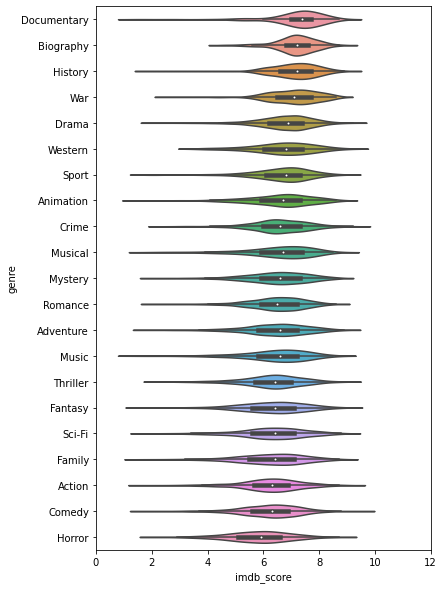

In [36]:
plt.figure(figsize=(6, 10))
sns.violinplot(x="imdb_score", y="genre", fliersize=0, data=byGenre,
            order=list(topGenres.index));
plt.xlim([0, 12]);

The above graph shows that all the genres have the same distribution, this shows that genre with 20+ categories is not significant in finding the ratings, hence we drop this column as well.
 

In [37]:
df1 = df1.drop([ 'genres'],axis = 1)

4.4.3.  Imputting the missing values

Dropping rows with many null values and important columns:


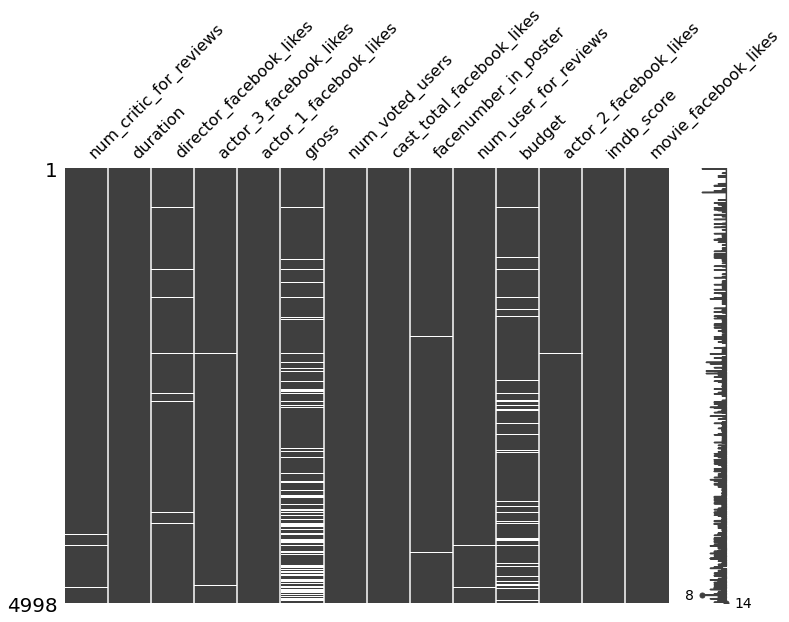

In [38]:
# print(df1.isna().sum())
missingno.matrix(df1,figsize=(12,8))

We can get a clear picture from above that the columns which have white spaces 
in it contain null values.

Gross , budget and title_year and aspect ration have huge null values. For all the 4 columns let us find the crrelation with IMDB scores. Dropping these rows is not an option. 



we can drop rows having null values in duration, face_numbers and actor2_facebooklikes columns as they are very few missing records and would not affect the ML model.


In [39]:
df1.dropna(axis=0,subset=['duration','facenumber_in_poster','actor_2_facebook_likes','num_critic_for_reviews','director_facebook_likes','num_user_for_reviews','actor_3_facebook_likes'],inplace=True)

From our study so far, the following variables seem to be important, hence we cannot afford to just drop the variables, instead we can impute the missing values with some imputation technique.

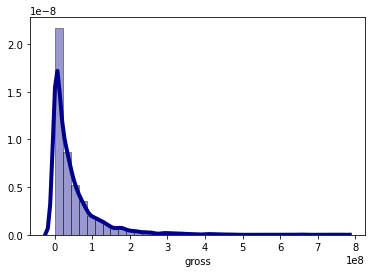

In [40]:
#Fins the distribution of the gross and budget variables before imputing values
sns.distplot(df1['gross'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

This shows gross is left skewed, hence mean imputaion is not the right choice, hence go for median imputation

In [41]:
df1.isnull().sum()

num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_1_facebook_likes         0
gross                        718
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster           0
num_user_for_reviews           0
budget                       367
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [42]:
df1.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [43]:
imp = SimpleImputer(missing_values=np.nan, strategy='median') #Imputing with median values
imp.fit(df1['gross'].values.reshape(-1, 1))
df1['gross'] = imp.transform(df1['gross'].values.reshape(-1, 1))

In [44]:
df1['gross'].isnull().sum()

0

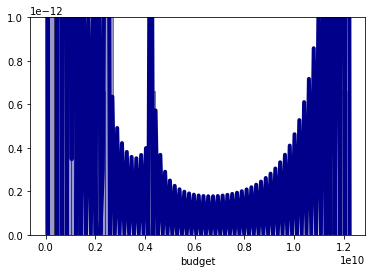

In [45]:
sns.distplot(df1['budget'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [46]:
#Imputing with mean for budget
imp = SimpleImputer(missing_values=np.nan, strategy='mean') #Imputing with mean values
imp.fit(df1['budget'].values.reshape(-1, 1))
df1['budget'] = imp.transform(df1['budget'].values.reshape(-1, 1))

checking for null values after imputation

In [47]:
df1.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

# <font color=Purple> **5. EDA**

**Outlier Analysis**

Let's us begin our EDA by finding out the potential outliers and if they have any domain significance.

In [48]:
continous_variables = ['num_critic_for_reviews','duration',
'director_facebook_likes',
'actor_3_facebook_likes',
'actor_1_facebook_likes',
'gross','num_voted_users',	'cast_total_facebook_likes',	'facenumber_in_poster',	'num_user_for_reviews',	'budget',	'actor_2_facebook_likes',	'imdb_score',	'movie_facebook_likes']

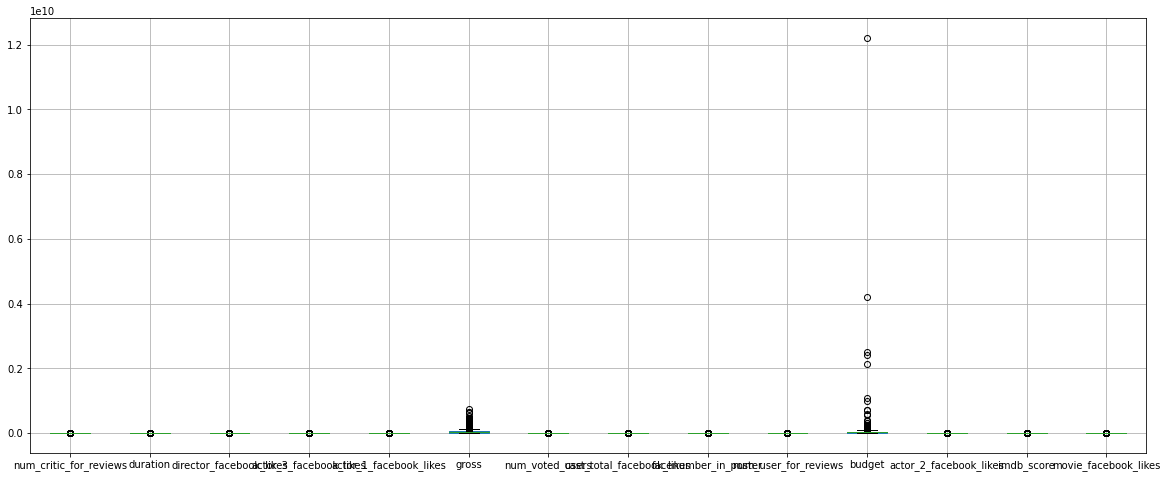

In [49]:
df1[continous_variables].boxplot(return_type ='axes',figsize = (20,8))

Except for Budget and gross column there are no potential outliers in the contimous variables and for budget it is understandable that few movies have high budget and hence on further inspecting the budget column we decide not to remove any outliers.



**EDA by finding out the correlations between the attributes and Target column**

**Correlation** is used to test if two attributes have any relationship among themselves. Correlation coefficient is a term that is usually used to show the strength of correlation between these two variables.


+1 : Positively correlated (directly related, increase in one causes increase in other)

-1 : Negatively correlated (Indirectly related, increase in one leads to decrease in other)

0 : No correlation coefficient values nearer to +1 or -1 indicate stronger correlation

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text major ticklabel objects>)

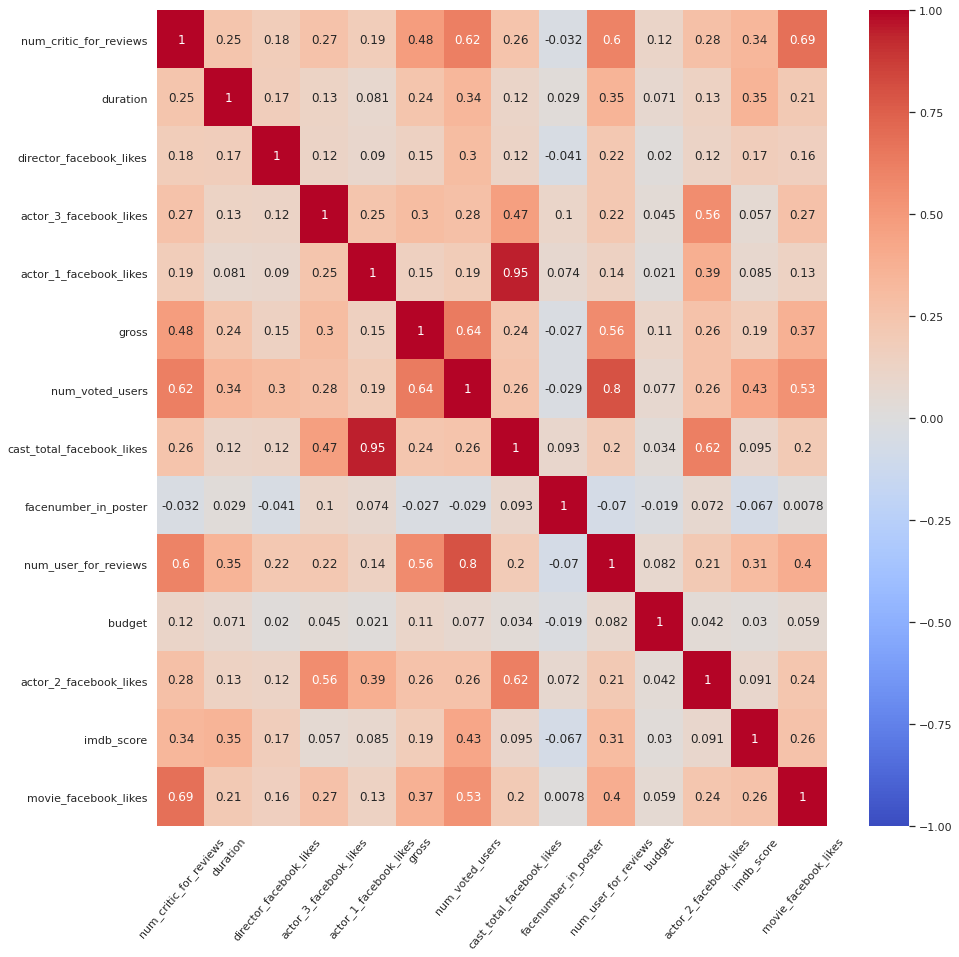

In [50]:
sns.set()
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm') # Correlation matrix for the dataframe
plt.xticks(rotation = 50)

**Correlation Insigths:**

*   The Imdb_score is correlated to movie_facebook_likes, num_voted_users ,num_users_for_reviews and duration and seems to be slightly negatively correlated to facenumber_poster
*   The cast_total_facebook_likes is positively correlated to the actor_1_facebook_likes and has smaller positive correlation with both actor_2_facebook_likes and highly correated to actor_3_facebook_likes
*   The movie_facebook_likes has strong correlation with num_critic_for_reviews,meaning crictic reviews make the movie popular.
*   The movie_facebook_likes has relatively large correlation with the num_voted_users, more popular the movies is more people view it.
*   The gross column has strong positive correlation with the num_voted_users.







**IMDb score  vs Independent variables realtionship - EDA**

Text(0.5, 1.0, 'Distribution of IMDB score in dataset')

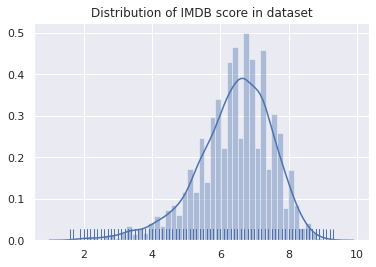

In [51]:
#Imdb score distplot
sns.distplot(df1[['imdb_score']],  rug=True) #Distplot shows average rating of movies is around 7 and its is nearly mormally distributed with sligthly right skewed data.
plt.title("Distribution of IMDB score in dataset")

In [52]:
df1.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

Joint plots with imdb ratings. The online activity of user about movies, specially thorugh social networking sites gives a fair estimate of the popularity of movies. 

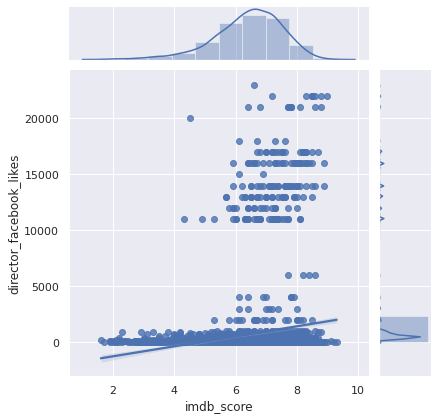

In [53]:
sns.jointplot(x='imdb_score', y='director_facebook_likes', #Relationship between imdb_score and popularity of director(social media) with the individual columns distributions
              data=df1, kind="reg", stat_func=None,
              marginal_kws={"bins": 10});

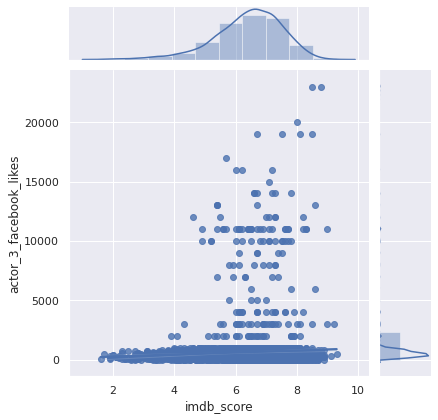

In [54]:
sns.jointplot(y='actor_3_facebook_likes', x='imdb_score',  #Relationship between imdb_score and popularity of actor 3(social media) with the individual columns distributions
              data=df1, kind="reg", stat_func=None,
              marginal_kws={"bins": 10});

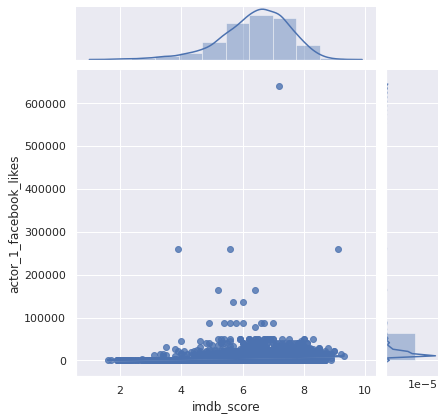

In [55]:
sns.jointplot(y='actor_1_facebook_likes', x='imdb_score',  #Relationship between imdb_score and popularity of actor 1 with the individual columns distributions
              data=df1, kind="reg", stat_func=None,
              marginal_kws={"bins": 10});

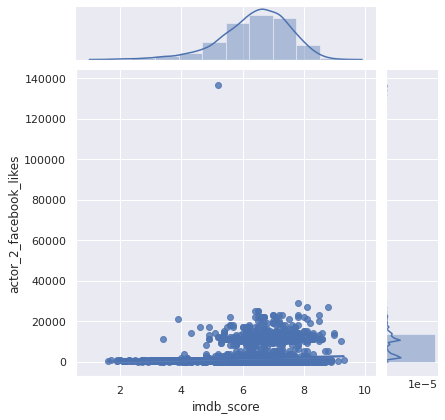

In [56]:
sns.jointplot(y='actor_2_facebook_likes', x='imdb_score',   #Relationship between imdb_score and popularity of actor_2(social media) with the individual columns distributions
              data=df1, kind="reg", stat_func=None,
              marginal_kws={"bins": 10});

Imdb scores are not solely influenced by cast/director Likes but most of the highly rated actor, directors have high Imdb score.

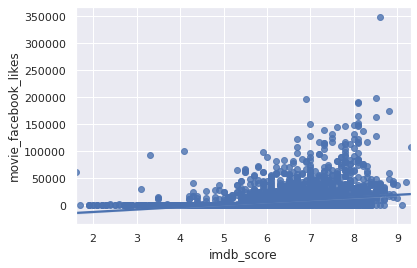

In [57]:
sns.regplot(df1['imdb_score'],df1['movie_facebook_likes']) #From the plots it is clear that IMDB score correlate with the movie popularity in the social network. From the plot below, it is evident that the movies that have  high number of facebook likes have IMDB scores >7

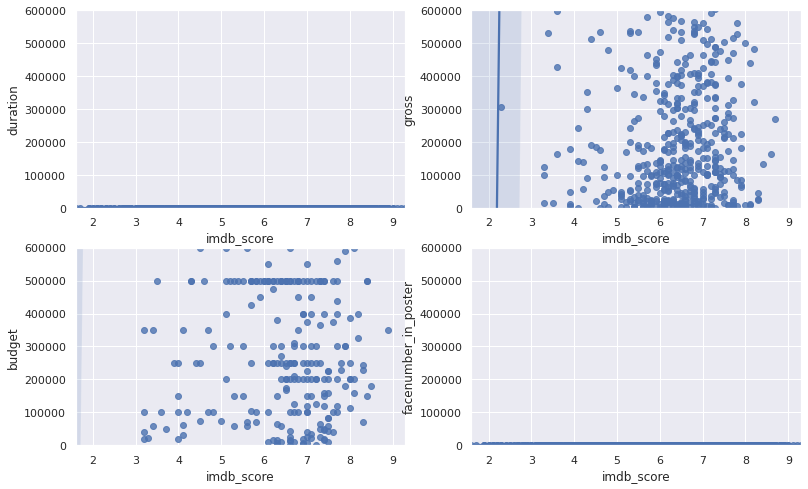

In [58]:
#Trying to understand imdbscores vs other categorical features 
fig,ax=plt.subplots(2,2,figsize=(13,8));
plt.subplot(2,2,1)
plt.ylim(0,600000)
sns.regplot(df1['imdb_score'],df1['duration'])
plt.subplot(2,2,2)
plt.ylim(0,600000)
sns.regplot(df1['imdb_score'],df1['gross'])

plt.subplot(2,2,3)
plt.ylim(0,600000)
sns.regplot(df1['imdb_score'],df1['budget'])

plt.subplot(2,2,4)
plt.ylim(0,600000)
sns.regplot(df1['imdb_score'],df1['facenumber_in_poster'])




The budget, gross amount, facenumber_poster, duration do not seem to solely influence the IMDB rating. The regression lines says it all.

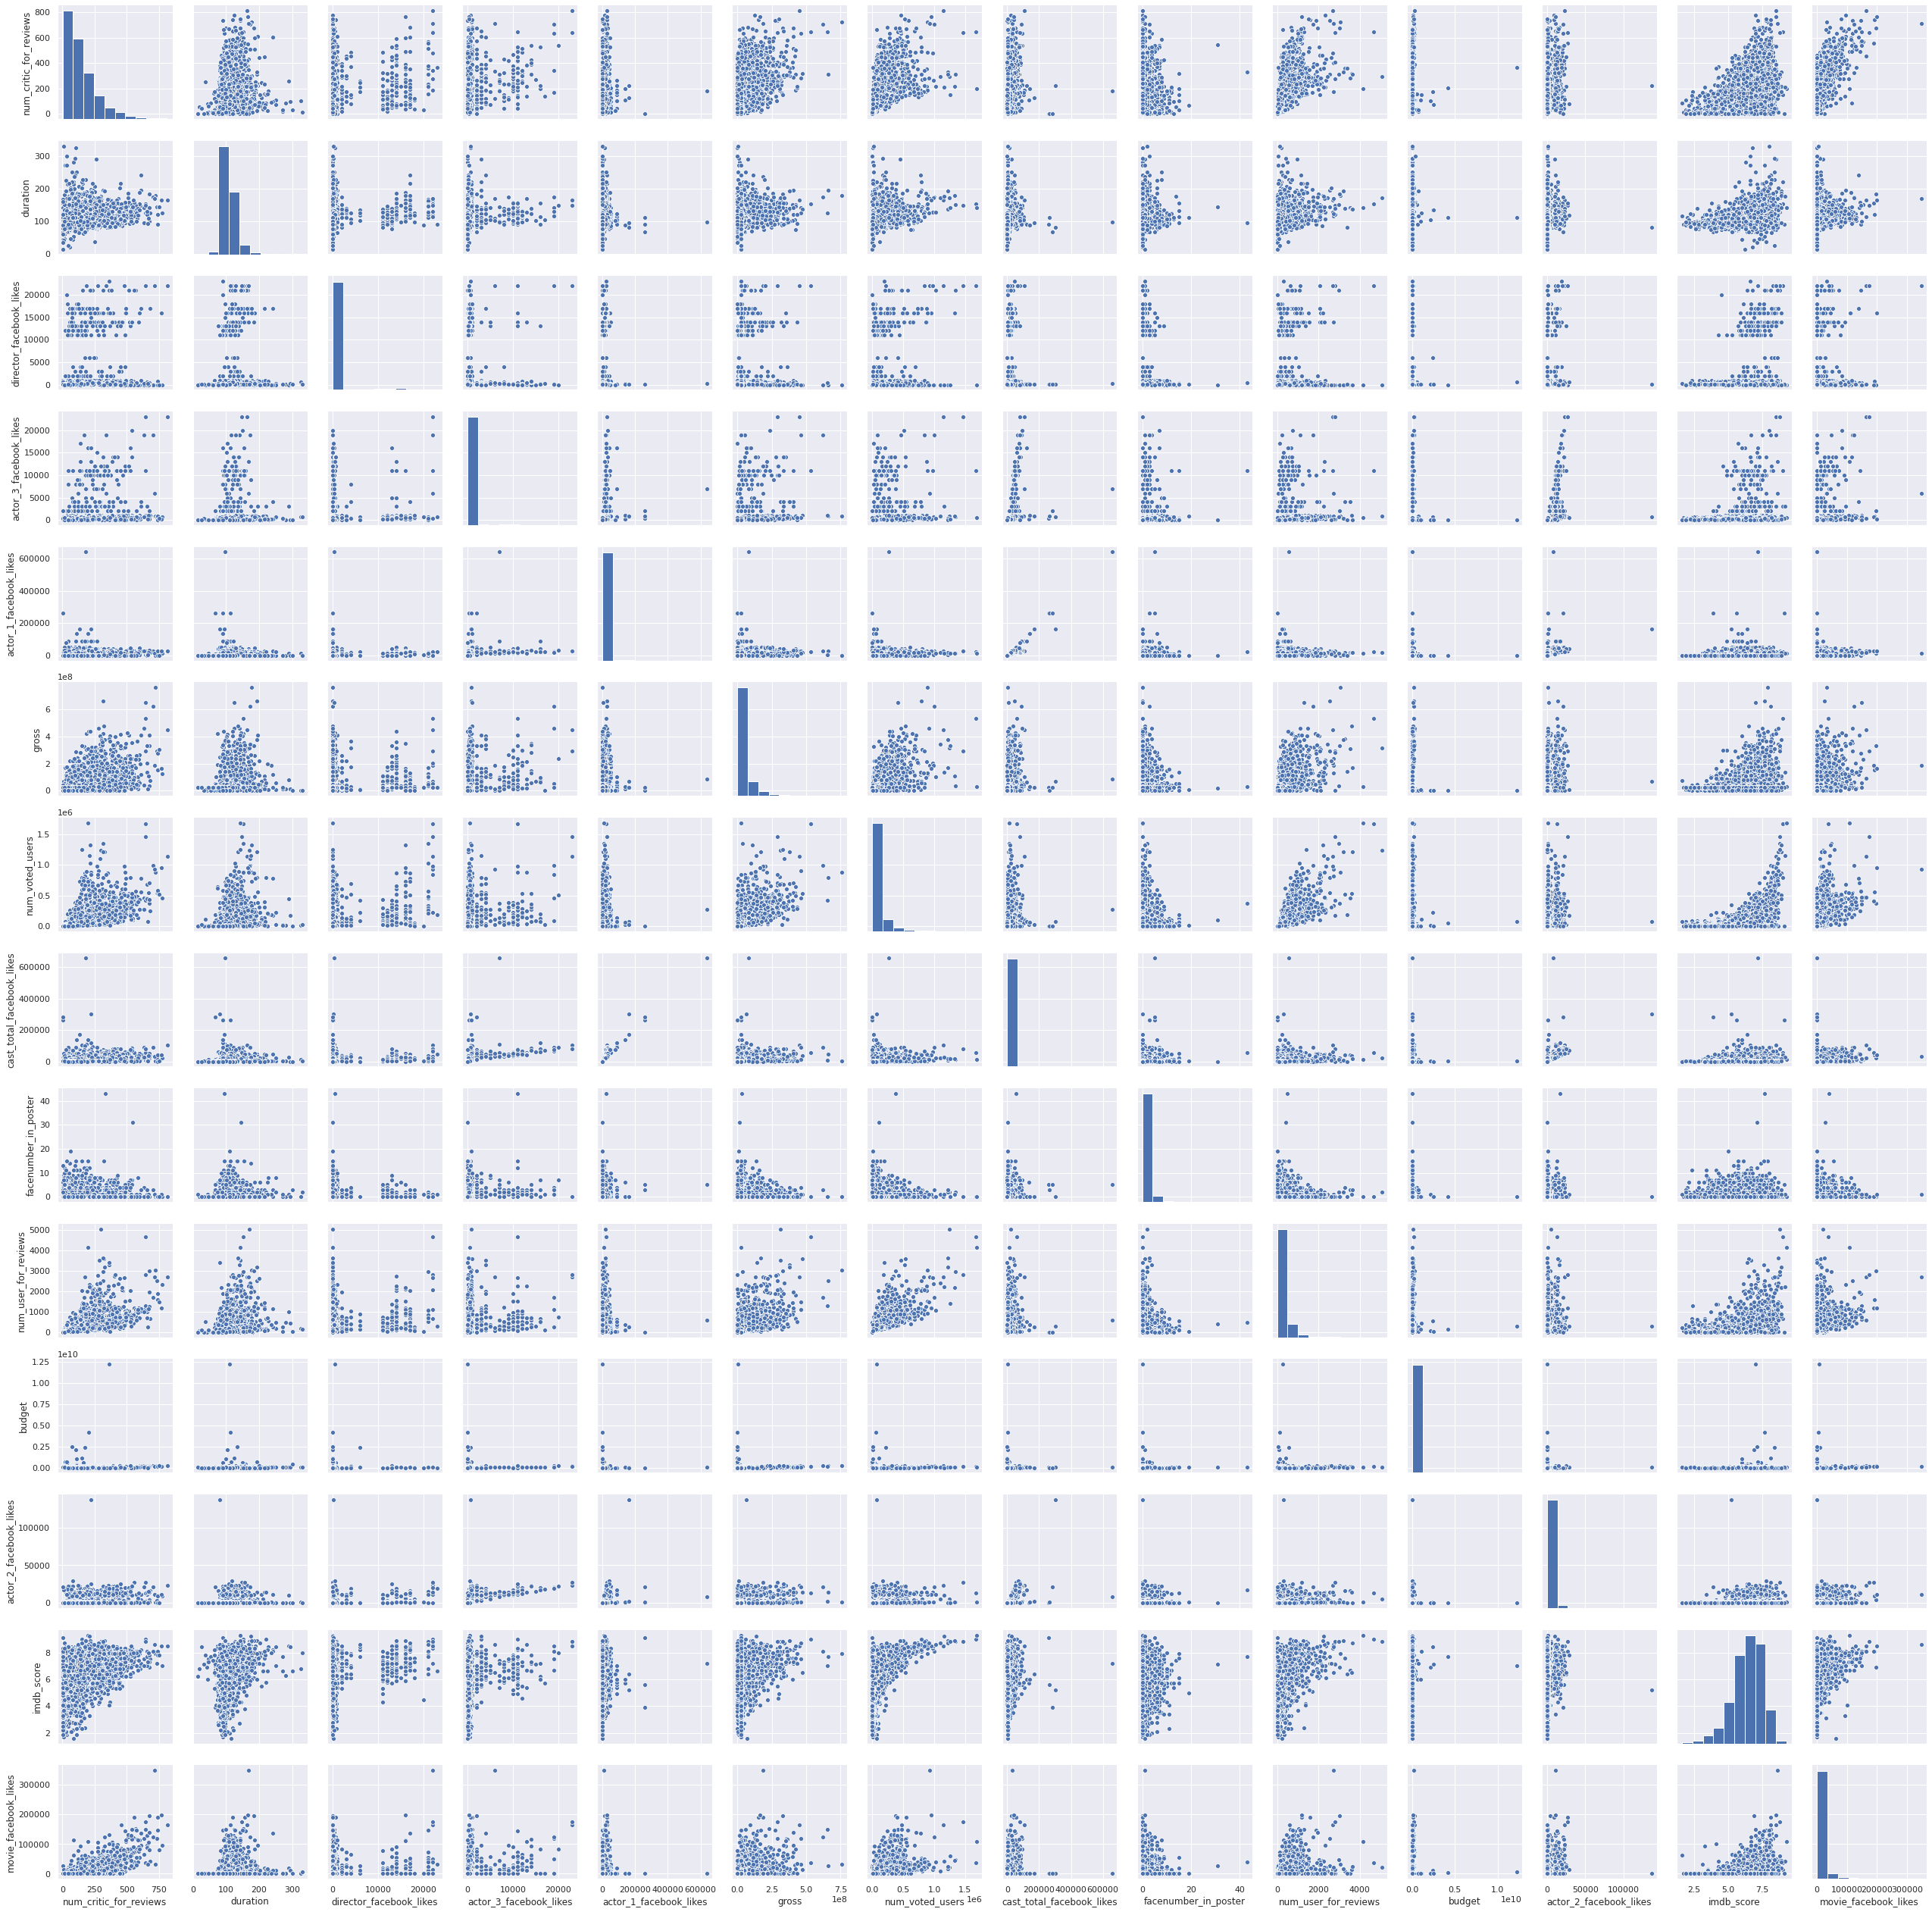

In [59]:
sns.pairplot(df1) # This plot gives a clear idea on the distributions, correlations in the dataset

Insights from the continuous variables
When it comes to continuous variables, features seem to be mostly skewed towards left . It means the features have mean lesser than the median.

If two attributes are highly correlated, then one of them can be ommitted from the final training dataset since it adds nothing more than redudancy.

Also, the attributes highly correlated to the target variable are very important and shouldbe preserved.

# <font color=Purple>**6. Checking Multi collinearity:**

Multicollinearity is a state of very high intercorrelations or inter-associations among the independent variables. It is therefore a type of disturbance in the data, and if present in the data the statistical inferences made about the data may not be reliable.

In [60]:
df1.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

VIF starts at 1 and has no upper limit


VIF = 1, no correlation between the independent variable and the other variables


VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [62]:
X = df1[['num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
       'movie_facebook_likes']]
calc_vif(X)

,variables,VIF
0,num_critic_for_reviews,5.933169
1,duration,3.657042
2,director_facebook_likes,1.181767
3,actor_3_facebook_likes,9.226618
4,actor_1_facebook_likes,298.046043
5,gross,2.820842
6,num_voted_users,5.226286
7,cast_total_facebook_likes,464.680988
8,facenumber_in_poster,1.494657
9,num_user_for_reviews,4.753358


As expected, the actor_1_facebook_likes and cast_total_facebook_likes and few other variables  have a high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity and recALCULATE the VIF

In [63]:
#drpping cast_total_facebook_likes and rechecking the scores
X = df1[['num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
        'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
       'movie_facebook_likes']]
calc_vif(X)

,variables,VIF
0,num_critic_for_reviews,5.932592
1,duration,3.535561
2,director_facebook_likes,1.181767
3,actor_3_facebook_likes,1.767899
4,actor_1_facebook_likes,1.428494
5,gross,2.691539
6,num_voted_users,5.207663
7,facenumber_in_poster,1.492510
8,num_user_for_reviews,4.753352
9,budget,1.060604


This has to be interative till we get vif values less than 10, ideally.
when cast_total_facebook_likes was removed the vif values came out to be under the range.

In [64]:
df1.drop("cast_total_facebook_likes",inplace=True,axis=1) #Due to above mentioned reasons dropping cast_total_facebook_likes

# <font color=Purple>**7. Data Preporcessing**

**Normalising Features**

In [65]:
#Normalising Features: feature scaling is needed to bring every feature in the same footing without any upfront importance.
#Since we are developing multiple machine learning model, few algorithms are sensitive to differences in the range of independent feature values.
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()

scaled_features= scaler_X.fit_transform(df1.drop("imdb_score",axis=1))
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.drop("imdb_score",axis=1).columns)

y_df = df1[["imdb_score"]]

In [66]:
scaled_features_df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
0,4.786855,3.094304,-0.245987,0.122284,-0.375473,11.314200,5.729776,-0.678456,7.275861,0.982972,-0.183058,1.307185
1,1.313746,2.694303,-0.048007,0.209185,2.176100,4.180454,2.759133,-0.678456,2.515383,1.297559,0.809605,-0.392297
2,3.788645,1.760965,-0.245987,-0.293643,0.278777,2.451503,1.360715,-0.179664,1.875759,1.022919,-0.315690,3.985157
3,5.529324,2.472079,7.490389,13.394183,1.325575,6.374282,7.577609,-0.678456,6.350504,1.047887,5.206242,8.053613
5,2.633692,1.049850,-0.078952,-0.072495,-0.399026,0.442874,0.904979,-0.179664,1.204678,1.116297,-0.257312,0.843690


**Train/val/Test split**

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(scaled_features_df,y_df,test_size=0.20,random_state=42)

**Upon understanding the patterns in the data, creating new features, normalizing data. It is time to build the model !**

# <font color=Purple>**8. Model Building**

## <font color=Blue> 8.1. Linear Regression

Linear Regression is he basline model for all regression studies. In this study let us comapre Ridge, lasso with plain linear regression and also study how L1 and L2 regularization work.

In [142]:
comp_param = pd.DataFrame() # To save all the model parameters of the above mentione 3 models
from sklearn.linear_model import LinearRegression

In [69]:
l_reg = LinearRegression() #Fitting regression model to data
l_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
l_reg.coef_[0]

array([ 0.21212734,  0.28652661,  0.02852234, -0.06094352,  0.01836479,
       -0.16010168,  0.56953375, -0.07147979, -0.22286712, -0.01216373,
       -0.00763867, -0.0482458 ])

In [71]:
print('Intercept Coefficient: ',l_reg.intercept_)
comp_param['Linear_Regression'] = l_reg.coef_[0]

Intercept Coefficient:  [6.42303296]


In [72]:
comp_param.set_index(keys = X_train.columns,inplace= True)

In [73]:
l_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

Parameter Tuning for Linear Regression

In [74]:
from sklearn.model_selection import GridSearchCV
#Simple Linear Regression 
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False]} #Different parameters to impute in the model and get best fit with best set of parameters
grid = GridSearchCV(l_reg,params,cv=None,scoring= 'neg_mean_squared_error') # Grid search cv to get the best set of parameters
grid.fit(X_train,y_train)
print("Mean Squared Error :", grid.best_score_)
print("Residual Sum of squares: %.2f"%np.mean((grid.predict(X_test) - y_test)**2))
l_reg_est =  grid.best_estimator_ #Best estimator
print(l_reg_est)

Mean Squared Error : -0.8986439029960321
Residual Sum of squares: 0.89
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


**Metrics:**


Mean Absolute Error (MAE)
Sum of the aboslute differences between predictions and actual values  


Mean Squared Error (MSE)

R-square score(Coefficient of determination): Indication of the goodness of fit of a set predictions to the actual values 

RMSLE- root mean square logarithmic error, as MSE pennalises errors with huge differences, rmsle is also used (More appropriate for higher values though)


MAPE - Mean absolute percentage error

In [147]:
#Model Evaluation in detail:
def mape(y_test, y_pred):
    y_true, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
def RMSLE(y_test, y_pred):
  return np.sqrt(mean_squared_log_error( y_test, y_pred ))
def evaluate(model, test_features, test_labels):
    pred = model.predict(test_features)
    errors = abs(pred - test_labels)
    accuracy = 100 - (100 * np.mean(errors / test_labels)) # value on right is mape
    return accuracy[0]
comp_eval_metrics = pd.DataFrame(columns=['R squared','Mean Absolute Error','Mean Absolute Percentage Error','Mean Squared Error','Root Mean Squared Error','Root Mean Squared Logarithmic Error','Model Accuracy ']) # table to save eval metrics

Evaluation metrics for best linear regression model

In [125]:
y_pred=l_reg_est.predict(X_test)
print("R squared:",metrics.r2_score(y_test,y_pred))
print("Mean Absolute Error                :",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error     :",mape(y_test, y_pred)[0])
print("Mean Squared Error                 :",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error            :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logarithmic Error:', np.sqrt(mean_squared_log_error( y_test, y_pred )))
print("Model Accuracy                     :",evaluate(l_reg_est, X_test,y_test) )

R squared: 0.2802472281360764
Mean Absolute Error                : 0.7258921105288936
Mean Absolute Percentage Error     : 13.053919278818155
Mean Squared Error                 : 0.8905109230468595
Root Mean Squared Error            : 0.9436688630271
Root Mean Squared Logarithmic Error: 0.14389907717138029
Model Accuracy                     : 83.459957


In [148]:
new_row= pd.Series([metrics.r2_score(y_test,y_pred),metrics.mean_absolute_error(y_test, y_pred),mape(y_test, y_pred)[0 ],metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred)),np.sqrt(mean_squared_log_error( y_test, y_pred )),evaluate(l_reg_est, X_test,y_test)], index = comp_eval_metrics.columns,name= 'Linear_Regression')
comp_eval_metrics = comp_eval_metrics.append(new_row) 

## <font color=Blue> 8.2. Ridge Regression

In [135]:
from sklearn.linear_model import Ridge
l_ridge = Ridge(alpha = 0.3)
l_ridge.fit(X_train,y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [136]:
print('Intercept Coefficient: ',l_ridge.intercept_)
comp_param['Ridge_Regression'] = l_ridge.coef_[0]

Intercept Coefficient:  [6.42303334]


In [81]:
l_ridge.get_params() #bydefaut hyperparameters for the model

{'alpha': 0.3,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [82]:
#Ridge Regression 
params = {'alpha':[25,10,4,2,1.0,0.8,0.3,0.1,0.02,0.01]} #hyper parameter tuning for Ridge regression with grid search cv
grid = GridSearchCV(l_ridge,params,cv=2,scoring= 'neg_mean_squared_error')
grid.fit(X_train,y_train)
print("Mean Squared Error :", grid.best_score_)
print("Residual Sum of squares: %.2f"%np.mean((grid.predict(X_test) - y_test)**2))
l_rid_est =  grid.best_estimator_
print(l_rid_est)

Mean Squared Error : -0.9068453697158361
Residual Sum of squares: 0.89
Ridge(alpha=25, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [150]:
y_pred=l_rid_est.predict(X_test)
print("R squared:",metrics.r2_score(y_test,y_pred))
print("Mean Absolute Error                :",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error     :",mape(y_test.to_numpy(), y_pred))
print("Mean Squared Error                 :",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error            :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logarithmic Error:', np.sqrt(mean_squared_log_error( y_test, y_pred )))
print("Model Accuracy                     :", 100 - (100 * np.mean(abs(l_rid_est.predict(X_test) - y_test.to_numpy()) / y_test.to_numpy())))

R squared: 0.28013783816966
Mean Absolute Error                : 0.7258921158575622
Mean Absolute Percentage Error     : 13.062257448094408
Mean Squared Error                 : 0.8906462652973842
Root Mean Squared Error            : 0.9437405709713789
Root Mean Squared Logarithmic Error: 0.14398452073996687
Model Accuracy                     : 86.93774255190559


In [151]:
row2 = [metrics.r2_score(y_test,y_pred),metrics.mean_absolute_error(y_test, y_pred),mape(y_test.to_numpy(), y_pred),metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred)),np.sqrt(mean_squared_log_error( y_test, y_pred )),100 - (100 * np.mean(abs(l_rid_est.predict(X_test) - y_test.to_numpy()) / y_test.to_numpy()))]

In [152]:
new_row= pd.Series(row2, index = comp_eval_metrics.columns,name='Ridge_Regression')
comp_eval_metrics =comp_eval_metrics.append(new_row) 

In [153]:
comp_eval_metrics

,R squared,Mean Absolute Error,Mean Absolute Percentage Error,Mean Squared Error,Root Mean Squared Error,Root Mean Squared Logarithmic Error,Model Accuracy
Linear_Regression,0.280247,0.725892,13.053919,0.890511,0.943669,0.143899,83.459957
Ridge_Regression,0.280138,0.725892,13.062257,0.890646,0.943741,0.143985,86.937743


## <font color=Blue> 8.3. Lasso Regression

In [87]:
from sklearn.linear_model import Lasso
l_lasso = Lasso(alpha = 0.3,)
l_lasso.fit(X_train,y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [88]:
print('Intercept Coefficient: ',l_lasso.intercept_)
comp_param['Lasso_Regression'] = l_lasso.coef_

Intercept Coefficient:  [6.41970138]


Parameter Tuning for Lasso model

In [89]:
#Lasso
params = {'alpha':[25,10,4,2,1.0,0.8,0.3,0.1,0.02,0.01]}
grid = GridSearchCV(l_lasso,params,cv=2,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)
print("Mean Squared Error :", grid.best_score_)
l_lasso =  grid.best_estimator_
print(l_lasso)

Mean Squared Error : -0.8957331914220772
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [173]:
y_pred=l_lasso.predict(X_test)
print("R squared:",metrics.r2_score(y_test,y_pred))
print("Mean Absolute Error                :",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error     :",mape(y_test.to_numpy(), y_pred))
print("Mean Squared Error                 :",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error            :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logarithmic Error:', np.sqrt(mean_squared_log_error( y_test, y_pred )))
print("Model Accuracy                     :", 100 - (100 * np.mean(abs(l_lasso.predict(X_test) - y_test.to_numpy()) / y_test.to_numpy())))

R squared: 0.277054539128715
Mean Absolute Error                : 0.7261356297133972
Mean Absolute Percentage Error     : 17.318617597699976
Mean Squared Error                 : 0.8944610633534875
Root Mean Squared Error            : 0.9457595166602806
Root Mean Squared Logarithmic Error: 0.14447854869083931
Model Accuracy                     : 82.68138240230002


In [174]:
row3 = [metrics.r2_score(y_test,y_pred),metrics.mean_absolute_error(y_test, y_pred),mape(y_test.to_numpy(), y_pred),metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred)),np.sqrt(mean_squared_log_error( y_test, y_pred )),100 - (100 * np.mean(abs(l_lasso.predict(X_test) - y_test.to_numpy()) / y_test.to_numpy()))]

In [175]:
new_row= pd.Series(row3, index = comp_eval_metrics.columns,name='Lasso_Regression')
comp_eval_metrics =comp_eval_metrics.append(new_row) 

In [157]:
comp_eval_metrics

,R squared,Mean Absolute Error,Mean Absolute Percentage Error,Mean Squared Error,Root Mean Squared Error,Root Mean Squared Logarithmic Error,Model Accuracy
Linear_Regression,0.280247,0.725892,13.053919,0.890511,0.943669,0.143899,83.459957
Ridge_Regression,0.280138,0.725892,13.062257,0.890646,0.943741,0.143985,86.937743
Lasso_Regression,0.277055,0.726136,17.318618,0.894461,0.945760,0.144479,82.681382


## <font color=Blue> 8.4. Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
l_rf = RandomForestRegressor(max_depth=2)
l_rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [94]:
#Randomforest regressor will not have estimators like ridge, lasso and linear

In [95]:
l_rf.get_params() #bydefaut hyperparameters for the model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [96]:
n_estimators = [100, 500]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [97]:
params = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [98]:

grid = GridSearchCV(l_rf,params,cv=2,scoring= 'neg_mean_squared_error')
grid.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=2,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [99]:
print("Mean Squared Error :", grid.best_score_)


Mean Squared Error : -0.6599610772709793


In [100]:
print("Residual Sum of squares: %.2f"%np.mean((grid.predict(X_test) - y_test.to_numpy())**2))


Residual Sum of squares: 1.81


In [101]:
l_rf_est =  grid.best_estimator_ 
print(l_rf_est)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [162]:
y_pred=l_rf_est.predict(X_test.to_numpy())
print("R squared:",metrics.r2_score(y_test,y_pred))
print("Mean Absolute Error                :",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error     :",mape(y_test.to_numpy(), y_pred))
print("Mean Squared Error                 :",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error            :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logarithmic Error:', np.sqrt(mean_squared_log_error( y_test, y_pred )))
print("Model Accuracy                     :", 100 - (100 * np.mean(abs(l_rf_est.predict(X_test) - y_test.to_numpy()) / y_test.to_numpy())))

R squared: 0.4698398697415995
Mean Absolute Error                : 0.5962320004163456
Mean Absolute Percentage Error     : 18.5220753484084
Mean Squared Error                 : 0.655938268548008
Root Mean Squared Error            : 0.8099001596172258
Root Mean Squared Logarithmic Error: 0.12756582601850733
Model Accuracy                     : 84.675345


In [168]:
row4 = [metrics.r2_score(y_test,y_pred),metrics.mean_absolute_error(y_test, y_pred),mape(y_test.to_numpy(), y_pred),metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred)),np.sqrt(mean_squared_log_error( y_test, y_pred )),100 - (100 * np.mean(abs(l_rf_est.predict(X_test) - y_test.to_numpy()) / y_test.to_numpy()))]

In [169]:
new_row= pd.Series(row4, index = comp_eval_metrics.columns,name='Random_Forest_Regressor')
comp_eval_metrics =comp_eval_metrics.append(new_row) 

In [172]:
comp_eval_metrics

,R squared,Mean Absolute Error,Mean Absolute Percentage Error,Mean Squared Error,Root Mean Squared Error,Root Mean Squared Logarithmic Error,Model Accuracy
Linear_Regression,0.280247,0.725892,13.053919,0.890511,0.943669,0.143899,83.459957
Ridge_Regression,0.280138,0.725892,13.062257,0.890646,0.943741,0.143985,86.937743
Random_Forest_Regressor,0.469840,0.596232,18.522075,0.655938,0.809900,0.127566,84.675345


## <font color=Blue> 8.5. GradientBoosting Regressor

This is an ensemble method created from a set of weak learners.



In [105]:
from sklearn import ensemble
params = {'n_estimators': 100,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
l_gb = ensemble.GradientBoostingRegressor(**params)
l_gb.fit(X_train.to_numpy(), y_train.to_numpy())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
l_gb.get_params() #bydefaut hyperparameters for the model

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [127]:
y_pred=l_gb.predict(X_test.to_numpy())
print("R squared:",metrics.r2_score(y_test,y_pred))
print("Mean Absolute Error                :",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error     :",mape(y_test.to_numpy(), y_pred))
print("Mean Squared Error                 :",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error            :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logarithmic Error:', np.sqrt(mean_squared_log_error( y_test, y_pred )))
print("Model Accuracy                     :", 100 - (100 * np.mean(abs(l_gb.predict(X_test) - y_test.to_numpy()) / y_test.to_numpy())))

R squared: 0.355261842293237
Mean Absolute Error                : 0.6765170896566934
Mean Absolute Percentage Error     : 16.540042989109146
Mean Squared Error                 : 0.7976994245623124
Root Mean Squared Error            : 0.8931402043141449
Root Mean Squared Logarithmic Error: 0.13903240817802004
Model Accuracy                     : 86.946081


In [177]:
row5 = [metrics.r2_score(y_test,y_pred),metrics.mean_absolute_error(y_test, y_pred),mape(y_test.to_numpy(), y_pred),metrics.mean_squared_error(y_test, y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred)),np.sqrt(mean_squared_log_error( y_test, y_pred )),100 - (100 * np.mean(abs(l_gb.predict(X_test) - y_test.to_numpy()) / y_test.to_numpy()))]

In [178]:
new_row= pd.Series(row5, index = comp_eval_metrics.columns,name='Gradient_Boosting_Regressor')
comp_eval_metrics =comp_eval_metrics.append(new_row) 

In [179]:
comp_eval_metrics

,R squared,Mean Absolute Error,Mean Absolute Percentage Error,Mean Squared Error,Root Mean Squared Error,Root Mean Squared Logarithmic Error,Model Accuracy
Linear_Regression,0.280247,0.725892,13.053919,0.890511,0.943669,0.143899,83.459957
Ridge_Regression,0.280138,0.725892,13.062257,0.890646,0.943741,0.143985,86.937743
Random_Forest_Regressor,0.469840,0.596232,18.522075,0.655938,0.809900,0.127566,84.675345
Lasso_Regression,0.277055,0.726136,17.318618,0.894461,0.945760,0.144479,82.681382
Gradient_Boosting_Regressor,0.355262,0.676517,16.540043,0.797699,0.893140,0.139032,86.946081


## <font color=Blue> 8.6 Cross validate all the 5 models Results:

In [110]:
from sklearn.model_selection import cross_validate
scoring = {'neg_mean_absolute_error','neg_mean_squared_error','r2'} #‘neg_mean_absolute_error’ uses the function :metrics.mean_absolute_error and ‘neg_mean_squared_error’ uses metrics.mean_squared_error
comp_scores = pd.DataFrame()

In [111]:
for model in [l_reg,l_ridge,l_lasso,l_rf,l_gb]:
  scores = cross_validate(model,X_train, y_train, scoring=scoring,cv=5,return_train_score= True)
  score=[]
  for key in scores.keys():
    score.append(scores[key].mean())
  comp_scores[str(model)] = score
  comp_scores['metric_params'] = scores.keys()
comp_scores = comp_scores.set_index('metric_params')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [112]:
comp_scores

,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)","Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,\n normalize=False, random_state=None, solver='auto', tol=0.001)","Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,\n normalize=False, positive=False, precompute=False, random_state=None,\n selection='cyclic', tol=0.0001, warm_start=False)","RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',\n max_depth=2, max_features='auto', max_leaf_nodes=None,\n max_samples=None, min_impurity_decrease=0.0,\n min_impurity_split=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=None, verbose=0, warm_start=False)","GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',\n init=None, learning_rate=0.01, loss='ls', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=5,\n min_weight_fraction_leaf=0.0, n_estimators=100,\n n_iter_no_change=None, presort='deprecated',\n random_state=None, subsample=1.0, tol=0.0001,\n validation_fraction=0.1, verbose=0, warm_start=False)"
metric_params,,,,,
fit_time,0.006047,0.004288,0.004861,0.481604,1.380241
score_time,0.004374,0.003898,0.004541,0.010022,0.006108
test_neg_mean_squared_error,-0.898644,-0.898634,-0.894926,-0.913867,-0.796025
train_neg_mean_squared_error,-0.882932,-0.882932,-0.886168,-0.903325,-0.712043
test_neg_mean_absolute_error,-0.723508,-0.723505,-0.723381,-0.735533,-0.673162
train_neg_mean_absolute_error,-0.719230,-0.719227,-0.719852,-0.730809,-0.638071
test_r2,0.266059,0.266067,0.269054,0.253715,0.349899
train_r2,0.279403,0.279403,0.276762,0.262771,0.418863


The models cross validation results appear to be pretty consistent with the actual results

## <font color=Blue> 8.7.  Results Evaluation for all the models




In [180]:
comp_scores # Comparing crossvalidation scores for all the 3 models.

,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)","Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,\n normalize=False, random_state=None, solver='auto', tol=0.001)","Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,\n normalize=False, positive=False, precompute=False, random_state=None,\n selection='cyclic', tol=0.0001, warm_start=False)","RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',\n max_depth=2, max_features='auto', max_leaf_nodes=None,\n max_samples=None, min_impurity_decrease=0.0,\n min_impurity_split=None, min_samples_leaf=1,\n min_samples_split=2, min_weight_fraction_leaf=0.0,\n n_estimators=100, n_jobs=None, oob_score=False,\n random_state=None, verbose=0, warm_start=False)","GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',\n init=None, learning_rate=0.01, loss='ls', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=5,\n min_weight_fraction_leaf=0.0, n_estimators=100,\n n_iter_no_change=None, presort='deprecated',\n random_state=None, subsample=1.0, tol=0.0001,\n validation_fraction=0.1, verbose=0, warm_start=False)"
metric_params,,,,,
fit_time,0.006047,0.004288,0.004861,0.481604,1.380241
score_time,0.004374,0.003898,0.004541,0.010022,0.006108
test_neg_mean_squared_error,-0.898644,-0.898634,-0.894926,-0.913867,-0.796025
train_neg_mean_squared_error,-0.882932,-0.882932,-0.886168,-0.903325,-0.712043
test_neg_mean_absolute_error,-0.723508,-0.723505,-0.723381,-0.735533,-0.673162
train_neg_mean_absolute_error,-0.719230,-0.719227,-0.719852,-0.730809,-0.638071
test_r2,0.266059,0.266067,0.269054,0.253715,0.349899
train_r2,0.279403,0.279403,0.276762,0.262771,0.418863


From the above table cross validation scores seem to be consistent with actual results for all the five models.

In [181]:
print('\033[1m' + " *********** Feature impotance for each variable based on the Regression model   ***********")
comp_param # comp_param gives feature impotance for each variable based on th model
#Holding all other features fixed, a 1 unit increase in the variable shown below is associated with an increase of its corresponding linear rgeression coefficient.
#Lasso as known would elimante few features hence has value 0 for few variable  coefficients

 *********** Feature impotance for each variable based on the Regression model   ***********


""


In [182]:
print('\033[1m' + "                     ***********                        Comparing Evaluation metrics for all the five models                            ***********")
#Comparing Evaluation metrics for ell the 5 final models:
comp_eval_metrics

                     ***********                        Comparing Evaluation metrics for all the five models                            ***********


,R squared,Mean Absolute Error,Mean Absolute Percentage Error,Mean Squared Error,Root Mean Squared Error,Root Mean Squared Logarithmic Error,Model Accuracy
Linear_Regression,0.280247,0.725892,13.053919,0.890511,0.943669,0.143899,83.459957
Ridge_Regression,0.280138,0.725892,13.062257,0.890646,0.943741,0.143985,86.937743
Random_Forest_Regressor,0.469840,0.596232,18.522075,0.655938,0.809900,0.127566,84.675345
Lasso_Regression,0.277055,0.726136,17.318618,0.894461,0.945760,0.144479,82.681382
Gradient_Boosting_Regressor,0.355262,0.676517,16.540043,0.797699,0.893140,0.139032,86.946081


From all the above tables we can summarize that Gradient Boosting Regressor performed better as the total accuracy and r squared and all other value metrics are optimal for this model.

Hence **Gradient_Bossting_regressor with 86.94 %** accuracy is considered as the final model to be deployed in production.